In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [37]:
!wget $data -O data_for_churn.csv

--2023-02-06 20:26:13--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data_for_churn.csv'

     0K .......... .......... .......... .......... ..........  5%  180K 5s
    50K .......... .......... .......... .......... .......... 10% 1.83M 3s
   100K .......... .......... .......... .......... .......... 15%  311K 2s
   150K .......... .......... .......... .......... .......... 20%  320K 2s
   200K .......... .......... .......... .......... .......... 26%  286K 2s
   250K .......... .......... .......... .......... .......... 31% 1.83M 2s
   300K .......... .......... .......... .

In [127]:
df = pd.read_csv("data_for_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


In [129]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [130]:
tc=pd.to_numeric(df.totalcharges, errors='coerce')

In [131]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [132]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [133]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [134]:
df.churn = (df.churn == 'yes').astype(int)

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [137]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [138]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [139]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [140]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [141]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [142]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [143]:
df_full_train = df_full_train.reset_index(drop=True)

In [144]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [145]:
global_churn_rate = df_full_train.churn.mean().round(2)
global_churn_rate

0.27

In [146]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [147]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 
               'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [148]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [149]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [150]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [151]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [152]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [153]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [154]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [155]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [156]:
global_churn_rate - churn_partner

0.06493474245795922

In [157]:
churn_partner/global_churn_rate

0.7594724924338315

In [158]:
churn_no_partner/global_churn_rate

1.2216593879412643

In [159]:
from IPython.display import display

In [160]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [161]:
from sklearn.metrics import mutual_info_score

In [162]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [163]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [164]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)


In [165]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [166]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [167]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [168]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [169]:
from sklearn.feature_extraction import DictVectorizer

In [170]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [171]:
dv = DictVectorizer(sparse=False)

In [172]:
X_train = dv.fit_transform(train_dicts)

In [173]:
X_train.shape

(4225, 45)

In [174]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [175]:
X_val = dv.transform(val_dicts)

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\OLAMIDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [178]:
model.intercept_[0]

-0.10918840348733709

In [179]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [180]:
y_pred = model.predict_proba(X_val)[:, 1]

In [181]:
churn_decision = (y_pred >= 0.5)

In [182]:
df_val[churn_decision].customerid.head()

3     8433-wxgna
8     3440-jpscl
11    2637-fkfsy
12    7228-omtpn
19    6711-fldfb
Name: customerid, dtype: object

In [183]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [184]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [185]:
y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True])

In [186]:
(y_val == churn_decision).mean()

0.8026969481902059

In [187]:
df_pred = pd.DataFrame()
df_pred['customerid'] = df_val.customerid
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['probability'] = y_pred

In [188]:
df_pred.head()

,customerid,prediction,actual,probability
0,5846-neqvz,0,0,0.008966
1,3645-deygf,0,0,0.204205
2,3590-tcxtb,0,0,0.211922
3,8433-wxgna,1,1,0.543291
4,2654-vbvpb,0,0,0.213495


In [189]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [190]:
df_pred

,customerid,prediction,actual,probability,correct
0,5846-neqvz,0,0,0.008966,True
1,3645-deygf,0,0,0.204205,True
2,3590-tcxtb,0,0,0.211922,True
3,8433-wxgna,1,1,0.543291,True
4,2654-vbvpb,0,0,0.213495,True
...,...,...,...,...,...
1404,0980-pvmrc,0,0,0.313788,True
1405,2325-zusfd,0,1,0.039286,False
1406,7382-dfjtu,0,0,0.136217,True
1407,6521-yytyi,1,1,0.800175,True


In [191]:
df_pred.correct.mean()

0.8026969481902059

In [192]:
dv.get_feature_names()

c:\Users\OLAMIDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [193]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [194]:
model.intercept_[0]

-0.10918840348733709

In [195]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [196]:
small = ['contract', 'tenure', 'monthlycharges']

In [197]:
df_train[small].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9},
 {'contract': 'month-to-month', 'tenure': 17, 'monthlycharges': 102.55},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 58.2},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 68.95},
 {'contract': 'month-to-month', 't

In [198]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [199]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [200]:
dv_small.get_feature_names()

c:\Users\OLAMIDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [201]:
X_train_small = dv_small.transform(dicts_train_small)

In [202]:
X_train_small.shape[0]

4225

In [203]:
y_train.shape[0]

4225

In [204]:
assert X_train_small.shape[0] == y_train.shape[0]

In [205]:
model_small = LogisticRegression()  # default solver is okay
model_small.fit(X_train_small, y_train) # train the model

LogisticRegression()

In [206]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [207]:
w0 = model_small.intercept_[0]
w0

-2.476775657399558

In [208]:
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [209]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

c:\Users\OLAMIDE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Using The Model

In [210]:
dicts_train_full = df_full_train[categorical + numerical].to_dict(orient='records')

In [211]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_train_full)
y_full_train = df_full_train.churn.values

In [212]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [213]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [214]:
X_test = dv.transform(dicts_test)

In [215]:
y_pred = model.predict_proba(X_test)[:, 1]

In [216]:
churn_decision = (y_pred >= 0.5)

In [217]:
(churn_decision == y_test).mean()

0.815471965933286

In [218]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [219]:
X_small = dv.transform([customer])

In [220]:
model.predict_proba(X_small)[0, 1]

0.5968852088270501

In [221]:
y_test[-1]

1

In [222]:
len(y_val)

1409

In [223]:
(y_val == churn_decision).mean()

0.6167494677075941

In [224]:
869/1409

0.6167494677075941

In [225]:
from sklearn.metrics import accuracy_score

In [226]:
accuracy_score(y_val, y_pred >= 0.9)

0.7260468417317246

In [227]:
thresholds = np.linspace(0, 1, 21)
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print("%.2f %.3f" % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.402
0.10 0.448
0.15 0.480
0.20 0.514
0.25 0.532
0.30 0.546
0.35 0.561
0.40 0.576
0.45 0.591
0.50 0.617
0.55 0.629
0.60 0.655
0.65 0.673
0.70 0.691
0.75 0.703
0.80 0.716
0.85 0.725
0.90 0.726
0.95 0.726
1.00 0.726


In [228]:
scores

[0.2739531582682754,
 0.4024130589070263,
 0.4478353442157559,
 0.47977288857345635,
 0.5138396025550035,
 0.531582682753726,
 0.5457771469127041,
 0.560681334279631,
 0.5755855216465579,
 0.5911994322214337,
 0.6167494677075941,
 0.6288147622427254,
 0.6550745209368346,
 0.6728176011355571,
 0.6905606813342796,
 0.7026259758694109,
 0.71611071682044,
 0.7246273953158269,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

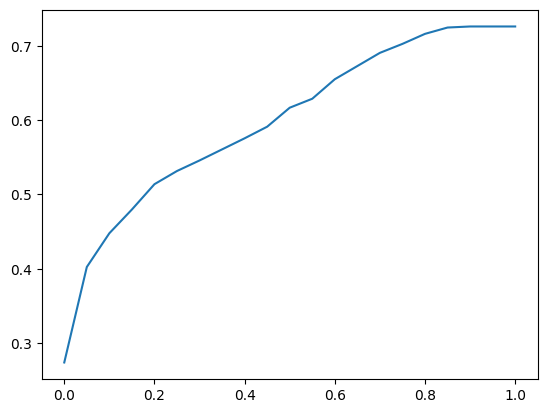

In [229]:
plt.plot(thresholds, scores)

In [230]:
from collections import Counter

In [231]:
Counter(y_pred >= 0.5)

Counter({False: 1097, True: 312})

Confusion Table

In [233]:
actual_postive = (y_val == 1)
actual_negative = (y_val == 0)

In [236]:
t = 0.5
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)

In [239]:
tp = (predicted_positive & actual_postive).sum()
tn = (predicted_negative & actual_negative).sum()
fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_postive).sum()

In [243]:
tp, tn, fp, fn

(79, 790, 233, 307)

In [244]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[790, 233],
       [307,  79]])

In [245]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.56, 0.17],
       [0.22, 0.06]])

In [246]:
from sklearn.metrics import confusion_matrix

In [247]:
confusion_matrix(y_val, y_pred >= 0.5)

array([[790, 233],
       [307,  79]], dtype=int64)

In [248]:
precision = tp / (tp + fp) 

In [249]:
precision

0.2532051282051282

In [252]:
recall = tp / (tp + fn)
recall

0.20466321243523317

In [254]:
from sklearn.metrics import precision_score, recall_score

In [255]:
precision_score(y_val, y_pred >= 0.5)

0.2532051282051282

In [256]:
recall_score(y_val, y_pred >= 0.5)

0.20466321243523317

Roc curve

In [257]:
tpr = tp/(tp+fn)

In [258]:
fpr = fp/(fp+tn)